# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)      

593

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #add 1 to the record count 
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
                        "City" :city,
                        "Lat" :city_lat,
                        "Lng" :city_lng,
                        "Max Temp" :city_max_temp,
                        "Humidity" :city_humidity,
                        "Cloudiness" :city_clouds,
                        "Windspeed" :city_wind,
                        "Country" :city_country,
                        "Date" :city_date})
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")
        
        
        

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | galle
Processing Record 7 of Set 1 | qulsary
Processing Record 8 of Set 1 | port saint john's
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | sakaiminato
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | nishinoomote
Processing Record 18 of Set 1 | tobi village
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | luderitz
P

In [83]:
# city_name = "London"
# url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
# url 

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Windspeed     566
Country       566
Date          566
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,papatowai,-46.5619,169.4708,44.82,85,98,12.84,NZ,1711580433
1,tiksi,71.6872,128.8694,-9.81,95,100,5.17,RU,1711580433
2,qaqortoq,60.7167,-46.0333,14.40,99,19,2.06,GL,1711580434
3,adamstown,-25.0660,-130.1015,76.41,68,48,13.35,PN,1711580434
4,bethel,41.3712,-73.4140,51.01,82,100,1.01,US,1711580434


In [86]:
# Export the City_Data into a csv
city_data_df.to_csv('weather_data.csv')
# import pandas as pd
# city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,vrangel',42.7297,133.0839,37.85,83,100,10.42,RU,1711576405
1,port-aux-francais,-49.3500,70.2167,42.66,85,100,29.19,TF,1711576405
2,west island,-12.1568,96.8225,80.58,78,100,8.05,CC,1711576406
3,adamstown,-25.0660,-130.1015,76.57,65,35,12.80,PN,1711576406
4,ushuaia,-54.8000,-68.3000,47.86,57,0,9.22,AR,1711576382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

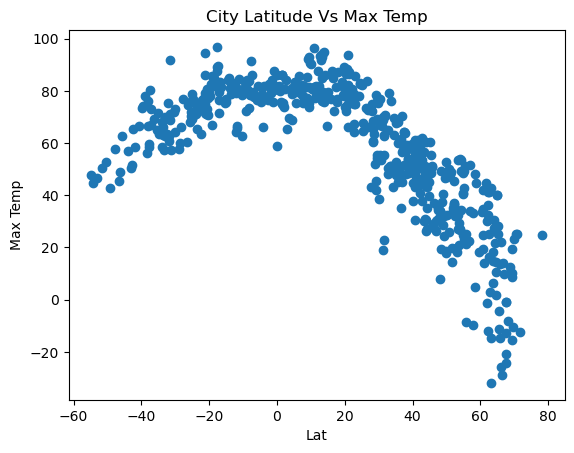

In [88]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"]) 

# Incorporate the other graph properties
#plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "darkred")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("City Latitude Vs Max Temp")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

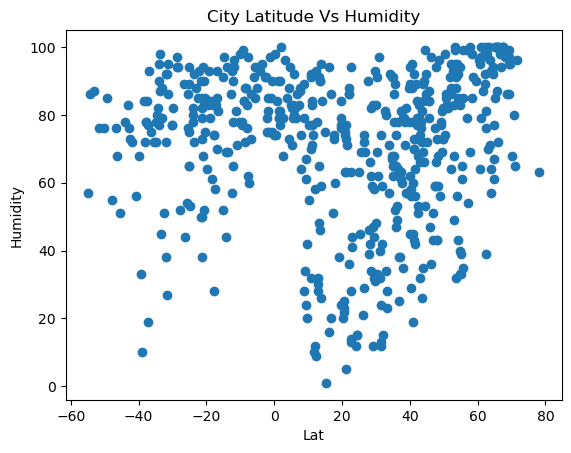

In [89]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"]) 


# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("City Latitude Vs Humidity")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

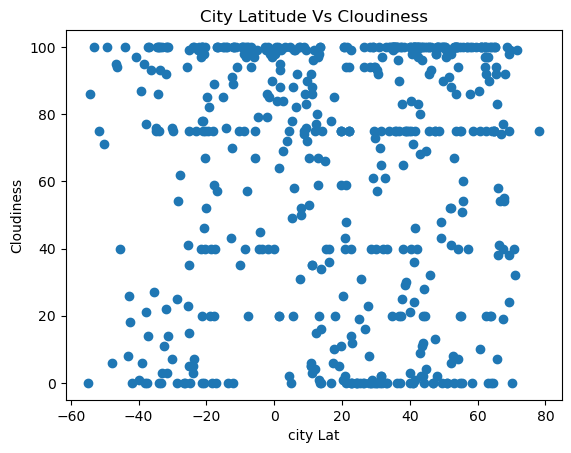

In [90]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"]) 


# Incorporate the other graph properties
plt.xlabel("city Lat")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs Cloudiness")



# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

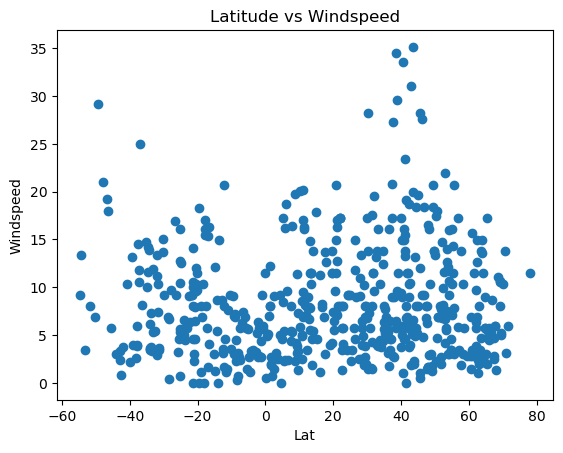

In [91]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Windspeed"]) 


# Incorporate the other graph properties
plt.xlabel("Lat")
plt.ylabel("Windspeed")
plt.title("Latitude vs Windspeed")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [92]:
# Define a function to create Linear Regression plots
def linear_function(x,y,title,label):
  
   slope, intercept, r, p, se = linregress (x,y)
   slope
   plt.scatter (x,y)
   plt.plot(x, intercept + slope*x, 'r', label='fitted line')
   plt.legend()

# Incorporate the other graph properties
   plt.xlabel("Lat")
   plt.ylabel(label)
   plt.title (title)

# Save the figure
   plt.savefig (f"../output_data/{label}.png")

# Show plot
   plt.show()

In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,vrangel',42.7297,133.0839,37.85,83,100,10.42,RU,1711576405
6,albany,42.6001,-73.9662,46.42,79,100,4.00,US,1711576235
7,stanley,54.8680,-1.6985,40.59,83,20,3.44,GB,1711576407
8,whitehorse,60.7161,-135.0538,42.10,64,75,6.91,CA,1711576407
9,paducah,37.0834,-88.6001,57.45,38,0,4.61,US,1711576407


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,42.66,85,100,29.19,TF,1711576405
2,west island,-12.1568,96.8225,80.58,78,100,8.05,CC,1711576406
3,adamstown,-25.0660,-130.1015,76.57,65,35,12.80,PN,1711576406
4,ushuaia,-54.8000,-68.3000,47.86,57,0,9.22,AR,1711576382
5,grytviken,-54.2811,-36.5092,44.89,86,86,13.33,GS,1711576406


###  Temperature vs. Latitude Linear Regression Plot

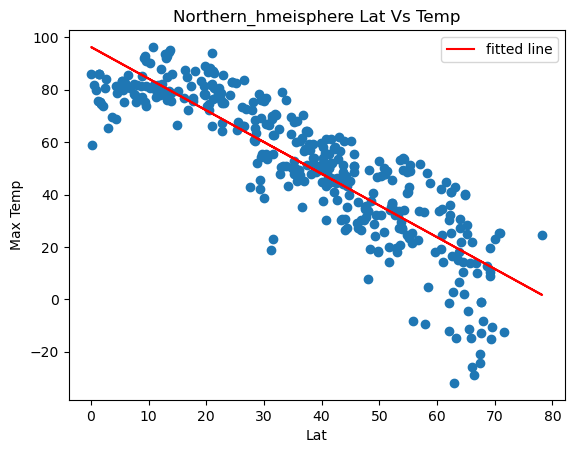

In [95]:
# Linear regression on Northern Hemisphere
linear_function(northern_hemi_df.Lat,northern_hemi_df['Max Temp'],'Northern_hmeisphere Lat Vs Temp','Max Temp')

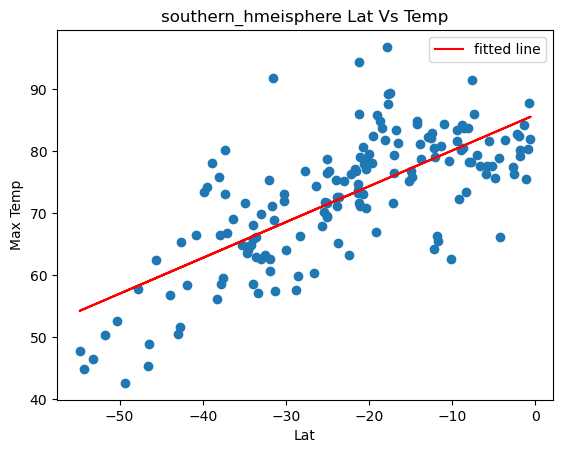

In [96]:
# Linear regression on Southern Hemisphere
linear_function(southern_hemi_df.Lat,southern_hemi_df['Max Temp'],'southern_hmeisphere Lat Vs Temp','Max Temp')
# 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

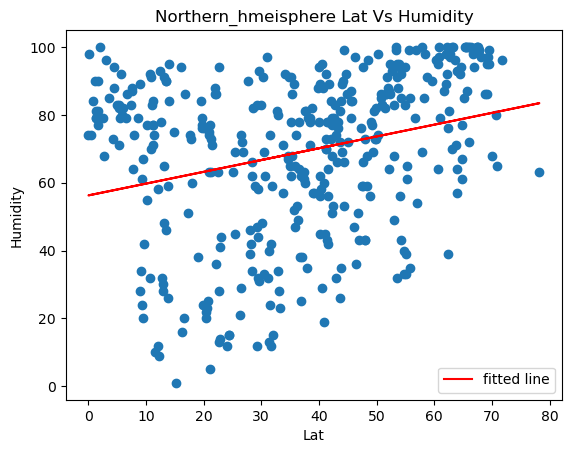

In [97]:
# Northern Hemisphere
linear_function(northern_hemi_df.Lat,northern_hemi_df.Humidity,'Northern_hmeisphere Lat Vs Humidity','Humidity')

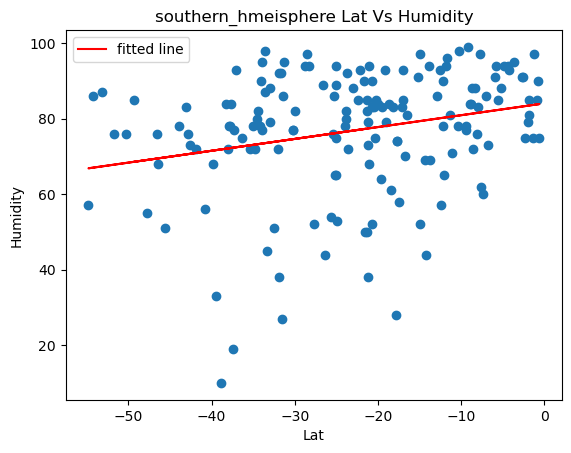

In [98]:
# Southern Hemisphere
linear_function(southern_hemi_df.Lat,southern_hemi_df.Humidity,'southern_hmeisphere Lat Vs Humidity','Humidity')


**Discussion about the linear relationship:** 


 Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.

It would be interesting to look at the city correlation of -10 to 10 latitude degrees from the equator and the Humidity to see if a stronger correlation exists without the outliers of further latitudes affecting the result.

### Cloudiness vs. Latitude Linear Regression Plot

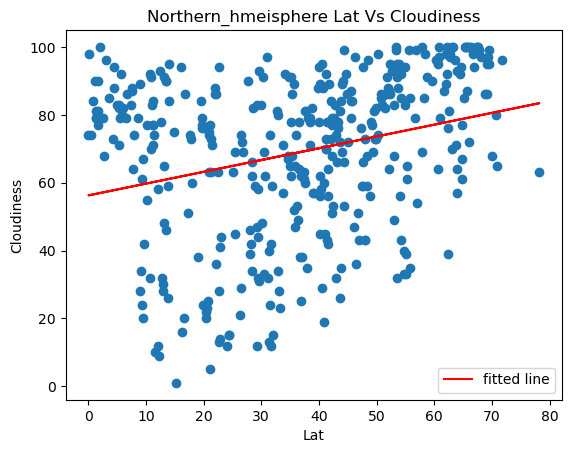

In [99]:
# Northern Hemisphere
linear_function(northern_hemi_df.Lat,northern_hemi_df.Humidity,'Northern_hmeisphere Lat Vs Cloudiness','Cloudiness')

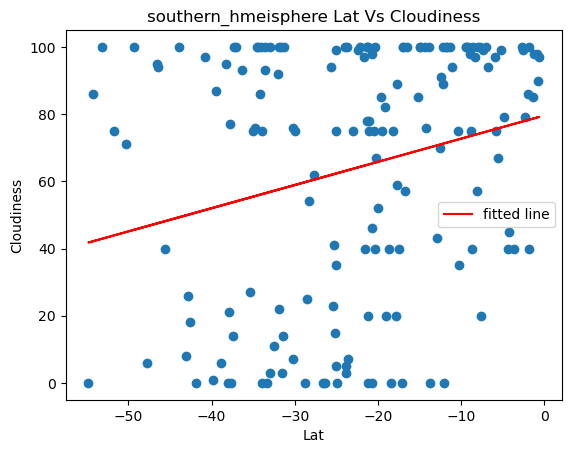

In [100]:
# Southern Hemisphere
linear_function(southern_hemi_df.Lat,southern_hemi_df.Cloudiness,'southern_hmeisphere Lat Vs Cloudiness','Cloudiness')


**Discussion about the linear relationship:** 

Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.

The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than that of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

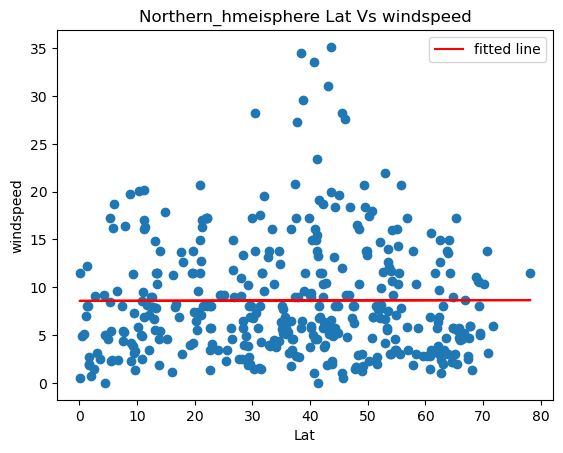

In [101]:
# Northern Hemisphere
linear_function(northern_hemi_df.Lat,northern_hemi_df.Windspeed,'Northern_hmeisphere Lat Vs windspeed','windspeed')

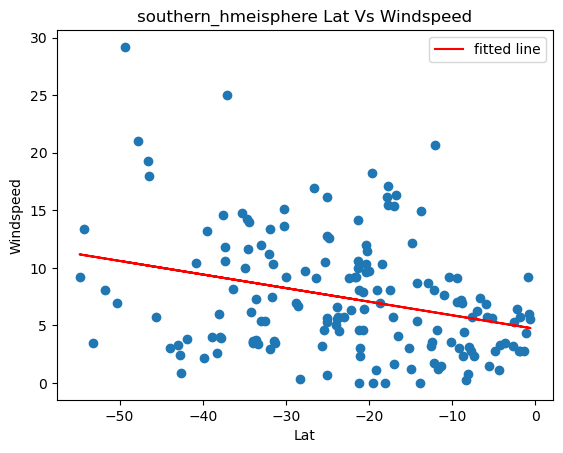

In [102]:
# Southern Hemisphere
linear_function(southern_hemi_df.Lat,southern_hemi_df.Windspeed,'southern_hmeisphere Lat Vs Windspeed','Windspeed')


**Discussion about the linear relationship:**

There is very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.